# Análisis Exploratorio de Datos - Movies Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_reviews = pd.read_json('IMDB_reviews.json', lines=True)
df_details = pd.read_json('IMDB_movie_details.json', lines=True)

In [3]:
print('Forma de las reviews del usuario: ', df_reviews.shape)
print('Forma de los detalles de las películas: ', df_details.shape)

Forma de las reviews del usuario:  (573913, 7)
Forma de los detalles de las películas:  (1572, 7)


In [4]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [5]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [6]:
print('Películas únicas en el dataset de reseñas:', df_reviews['movie_id'].nunique())

Películas únicas en el dataset de reseñas: 1572


In [7]:
reviews_meta = pd.DataFrame()
reviews_meta['is_spoiler'] = df_reviews['is_spoiler']
reviews_meta['has_word_spoiler'] = df_reviews['review_text'].apply(lambda text: 1 if 'SPOILER' in text.upper() else 0)

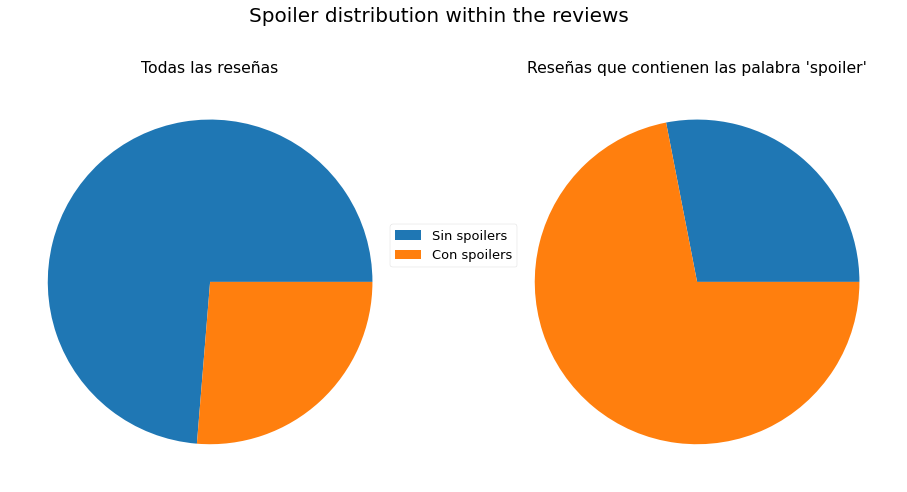

In [10]:
pie1 = reviews_meta['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie2 = reviews_meta[reviews_meta['has_word_spoiler'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')

with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(16, 8))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.pie(pie1['is_spoiler'])
    ax1.set_title('Todas las reseñas')

    ax2.pie(pie2['is_spoiler'])
    ax2.set_title('Reseñas que contienen las palabra \'spoiler\'')

    plt.suptitle('Spoiler distribution within the reviews', fontsize=20)
    fig.legend(labels=['Sin spoilers', 'Con spoilers'], loc='center')

    plt.show()

In [9]:
reviews_meta['word_count'] = df_reviews['review_text'].apply(lambda text: len(text.split(' ')))

C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


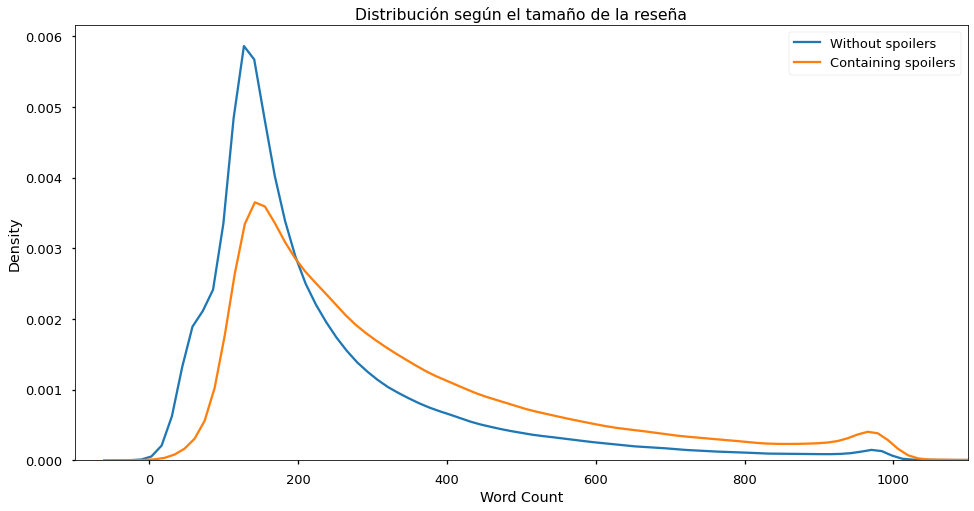

In [12]:
with plt.style.context('seaborn-talk'):
    plt.figure(figsize=(16, 8))
    sns.distplot(reviews_meta[reviews_meta['is_spoiler'] == False]['word_count'], hist=False, label='Without spoilers')
    sns.distplot(reviews_meta[reviews_meta['is_spoiler'] == True]['word_count'], hist=False, label='Containing spoilers')
    plt.legend()
    plt.xlim([-100, 1100])
    plt.xlabel('Word Count')
    plt.title('Distribución según el tamaño de la reseña')
    plt.show()